In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [65]:
def acquire_spec_data(filepath):
    with h5py.File(filepath, "r") as f:
        
        i_data = f['avgi'][0,0]
        q_data = f['avgq'][0,0]
        
        frequencies = f['x_pts'][()]
        
        return frequencies, i_data, q_data
        
        


In [69]:
def Amplitude_IQ(I, Q, phase_num_points = 200):
    '''
    IQ data is inputted and it will multiply by a phase such that all of the
    information is in I
    :param I:
    :param Q:
    :param phase_num_points:
    :return:
    '''
    complex_data = I + 1j * Q
    phase_values = np.linspace(0, np.pi, phase_num_points)
    multiplied_phase = [complex_data * np.exp(1j * phase) for phase in phase_values]
    Q_range = np.array([np.max(IQPhase.imag) - np.min(IQPhase.imag) for IQPhase in multiplied_phase])
    phase_index = np.argmin(Q_range)
    return(phase_values[phase_index])

In [89]:
plt.rcParams['font.size'] = 20

In [88]:
spec_filenames = []

spec_filenames.append(r'V:\QSimMeasurements\Measurements\5QV2_Triangle_Lattice\QubitSpecFF\QubitSpecFF_2025_03_03\QubitSpecFF_2025_03_03_21_18_05_data.h5')
spec_filenames.append(r'V:\QSimMeasurements\Measurements\5QV2_Triangle_Lattice\QubitSpecFF\QubitSpecFF_2025_03_04\QubitSpecFF_2025_03_04_14_41_44_data.h5')
spec_filenames.append(r'V:\QSimMeasurements\Measurements\5QV2_Triangle_Lattice\QubitSpecFF\QubitSpecFF_2025_03_04\QubitSpecFF_2025_03_04_14_52_22_data.h5')
# spec_filenames.append(r'V:\QSimMeasurements\Measurements\5QV2_Triangle_Lattice\QubitSpecFF\QubitSpecFF_2025_03_04\QubitSpecFF_2025_03_04_15_06_07_data.h5')

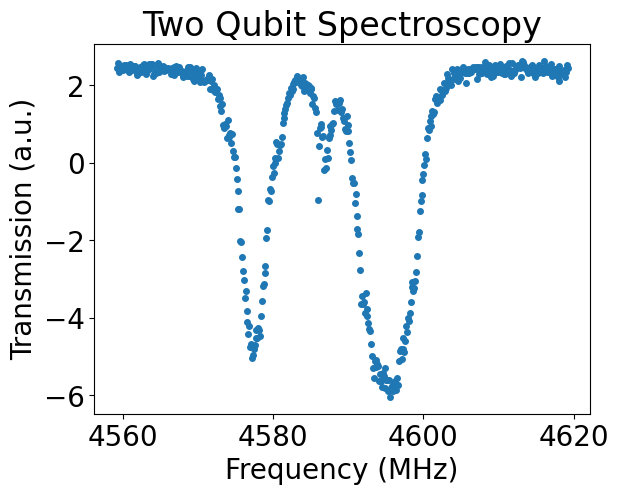

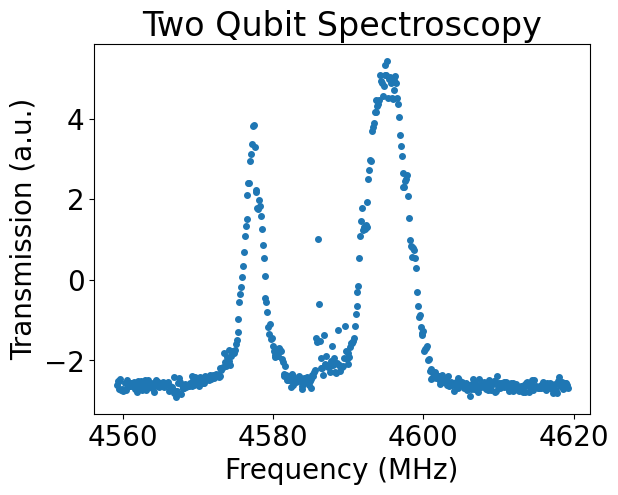

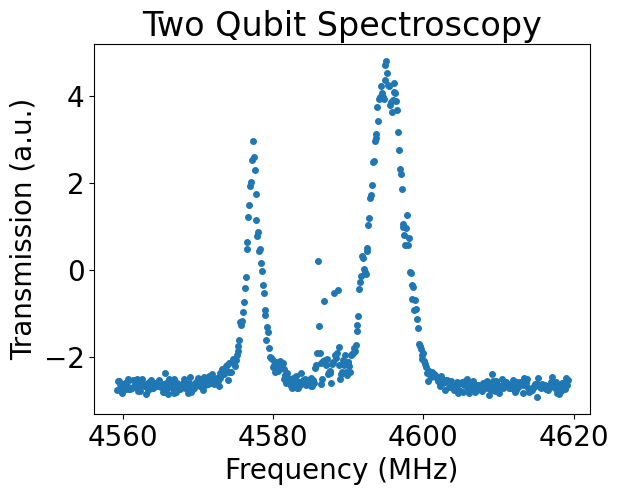

In [90]:
for i in range(len(spec_filenames)):
    frequencies, i_data, q_data = acquire_spec_data(spec_filenames[i])

    complex_data = i_data + 1j*q_data
    phase = Amplitude_IQ(i_data, q_data)

    complex_data *= np.exp(1j * phase)
    real_data = complex_data.real

    # plt.plot(frequencies, np.real(data), linestyle='', marker='o', ms=4)
    plt.plot(frequencies, -real_data, linestyle='', marker='o', ms=4)

    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Transmission (a.u.)')

    plt.title('Two Qubit Spectroscopy')

    plt.show()